In [ ]:
import pandas as pd

import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
data = pd.read_csv("loanapproval1.csv")

In [ ]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
obj = (data.dtypes == 'object')

In [ ]:
print("Categorical variables:", len(list(obj[obj].index)))

Categorical variables: 8


In [ ]:
data.drop(['Loan_ID'], axis=1, inplace=True)

In [ ]:
obj = (data.dtypes == 'object')

In [ ]:
object_cols = list(obj[obj].index)

In [ ]:
plt.figure(figsize=(18,36))

<Figure size 1800x3600 with 0 Axes>

<Figure size 1800x3600 with 0 Axes>

In [ ]:
index = 1

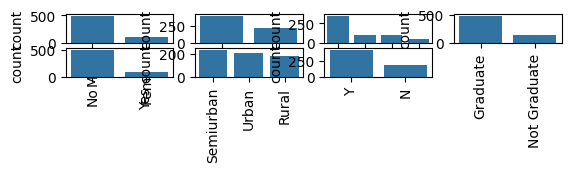

In [ ]:
for col in object_cols :
  y= data [col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [ ]:
# Import label encoder
from sklearn import preprocessing




In [ ]:
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data.head(5)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


<Axes: >

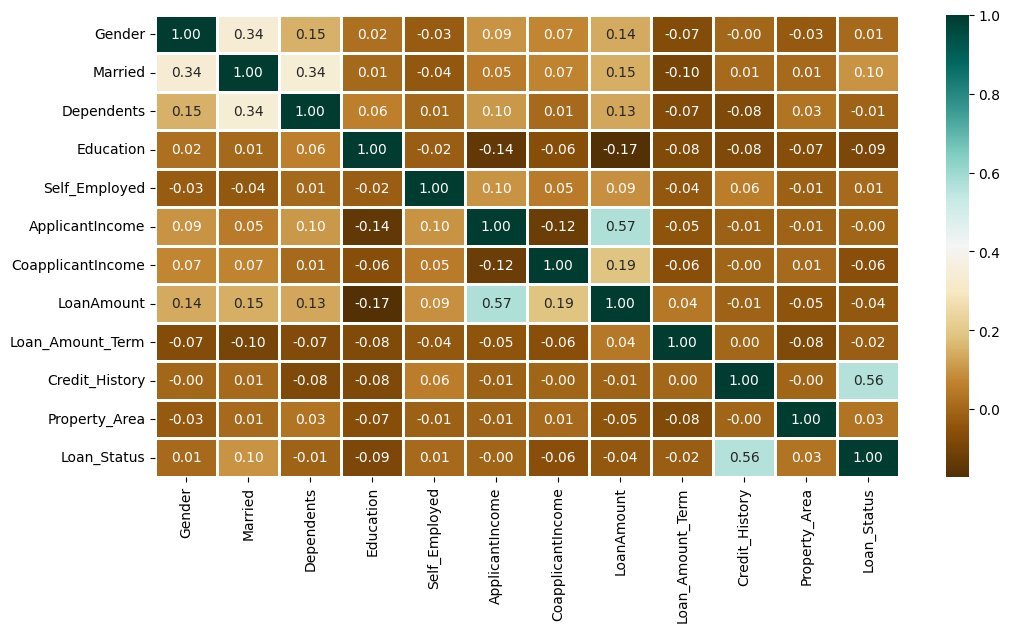

In [ ]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
			linewidths=2,annot=True)


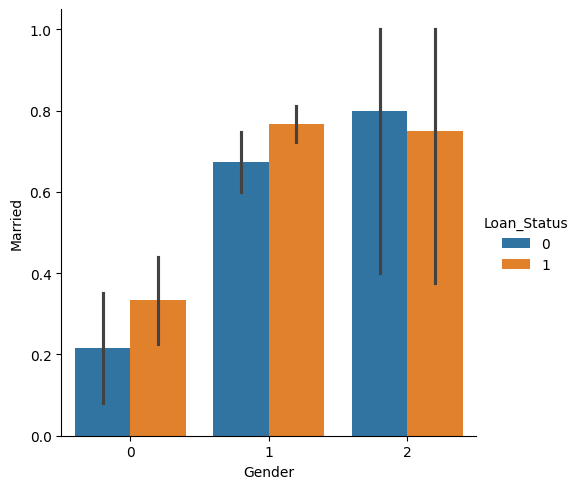

In [ ]:
sns.catplot(x="Gender", y="Married",
			hue="Loan_Status",
			kind="bar",
			data=data)


In [ ]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

In [ ]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#dataset splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= data.drop(['Loan_Status'], axis=1)
Y= data['Loan_Status']
X.shape, Y.shape

((614, 11), (614,))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
 from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
							criterion = 'entropy',
							random_state =7)
svc = SVC()
lc = LogisticRegression()



In [ ]:
# testing
for clf in (rfc, knn, svc,lc):
	clf.fit(X_train, Y_train)
	Y_pred = clf.predict(X_test)
	print("Accuracy score of ",
		clf.__class__.__name__,"=",
		100*metrics.accuracy_score(Y_test,
									Y_pred))


Accuracy score of  RandomForestClassifier = 76.42276422764228
Accuracy score of  KNeighborsClassifier = 62.19512195121951
Accuracy score of  SVC = 67.07317073170732
Accuracy score of  LogisticRegression = 78.86178861788618


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
